<a href="https://colab.research.google.com/github/ShakilM26/Some_Visualisation/blob/main/seaborn/seaborn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Save for next

In [ ]:
df = sns.load_dataset('penguins')

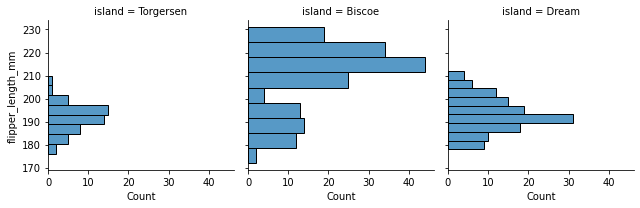

In [ ]:
#Histplot
#backbone of catplot, relplot, displot

g = sns.FacetGrid(df, col='island')
g.map_dataframe(sns.histplot, y='flipper_length_mm')


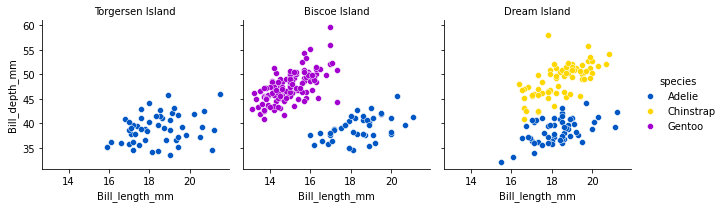

In [ ]:
#FacetGrid

g=sns.FacetGrid(df, col='island', hue='species', palette='prism')
g.map_dataframe(sns.scatterplot, y='bill_length_mm',
x='bill_depth_mm')
g.set_axis_labels('Bill_length_mm', 'Bill_depth_mm')
g.set_titles(col_template='{col_name} Island')
g.add_legend()

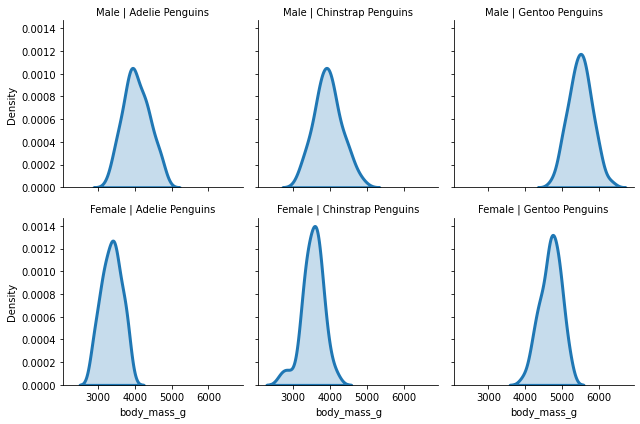

In [ ]:
s = 'body_mass_g'

g = sns.FacetGrid(df, row='sex', col='species')
g.map_dataframe(sns.kdeplot, x=s, lw=3, shade=True)
g.set_titles(row_template = '{row_name}', col_template='{col_name} Penguins')

In [ ]:
df = sns.load_dataset('mpg')
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [ ]:
oricy = (df.groupby('origin').cylinders.value_counts().unstack().fillna(0))
oricy

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


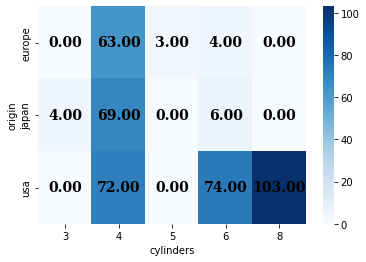

In [ ]:
# Heatmap

sns.heatmap(oricy, annot=True, cmap='Blues', fmt='.2f', 
            annot_kws={'fontsize':14, 'fontweight':'bold',
                       'fontfamily':'serif', 'color':'black'})

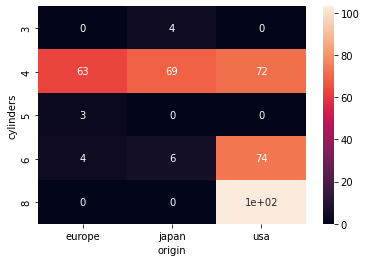

In [ ]:
oricy.T
sns.heatmap(oricy.T, annot=True)

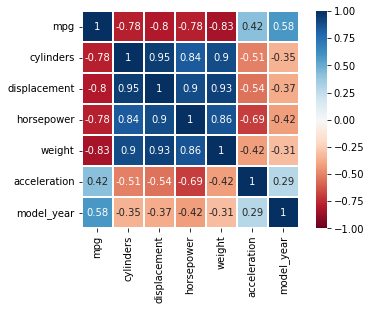

In [ ]:
# Correlation

sns.heatmap(df.corr(), cmap='RdBu', center=0, annot=True,
            vmax=1, vmin=-1, linecolor='white', linewidth=1, square=True)

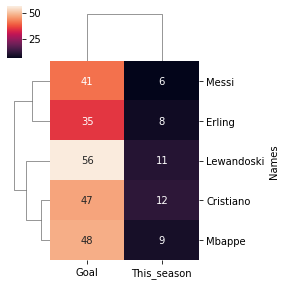

In [4]:
names=['Messi', 'Cristiano', 'Lewandoski', 'Mbappe', 'Erling']
goals=[41,47,56,48,35]
this=[6,12,11,9,8]

df = pd.DataFrame({'Names':names, 'Goal':goals, 'This_season':this})
df.set_index('Names', inplace=True)

sns.clustermap(df, annot=True, figsize=(4,4))

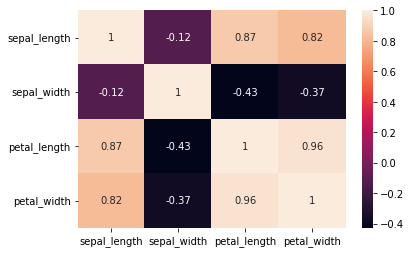

In [ ]:
flights = sns.load_dataset('iris')

f = flights.corr()
sns.heatmap(f, annot=True, robust=True)

In [ ]:
# cylinder check

df=df[df.cylinders.isin([4,6,8])]

In [ ]:
df['new model'] = df.model_year > 76

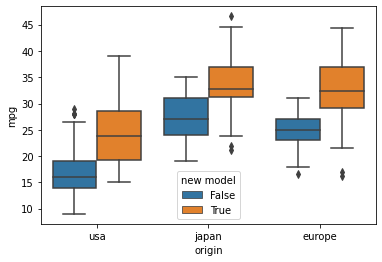

In [ ]:
# Boxplot

sns.boxplot(x='origin', y='mpg', data=df, hue='new model')

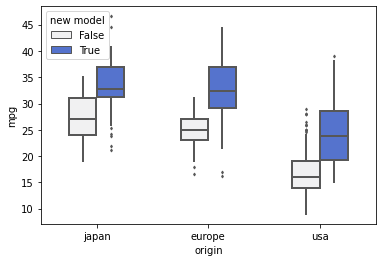

In [ ]:
sns.boxplot(x='origin', y='mpg', data=df, hue='new model',
            order=['japan','europe','usa'], color='RoyalBlue',
            width=0.5, linewidth=2, whis=1, fliersize=2, showcaps=False)

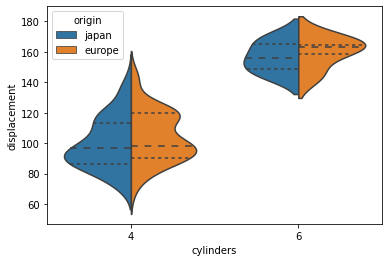

In [ ]:
# Violin

sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=df[df.origin.isin(['japan', 'europe'])],
               split=True, inner='quartiles')

# split use korar jonno 2 ta hue option thakte hobe


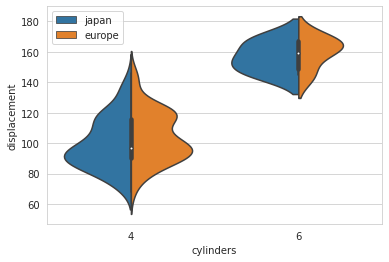

In [ ]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=df[df.origin.isin(['japan','europe'])],
               scale='count', split=True, scale_hue=True)
plt.legend(loc='upper left')

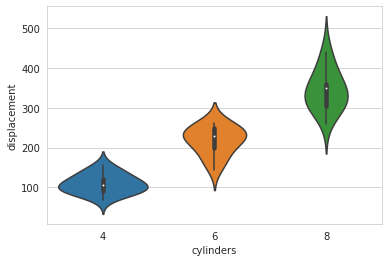

In [ ]:
sns.violinplot(x='cylinders', y='displacement', data=df, bw=0.8)

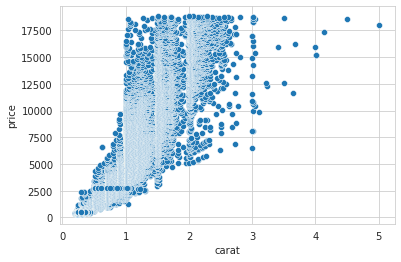

In [ ]:
# scatterplot

x = sns.load_dataset('diamonds')
sns.scatterplot(x='carat', y='price', data=x)

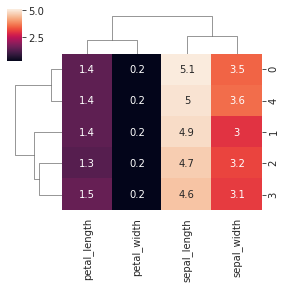

In [ ]:
i = sns.load_dataset('iris')

n=i.columns[0:4]
sns.clustermap(i[n].head(5), annot=True, figsize=(4,4), metric='cityblock')


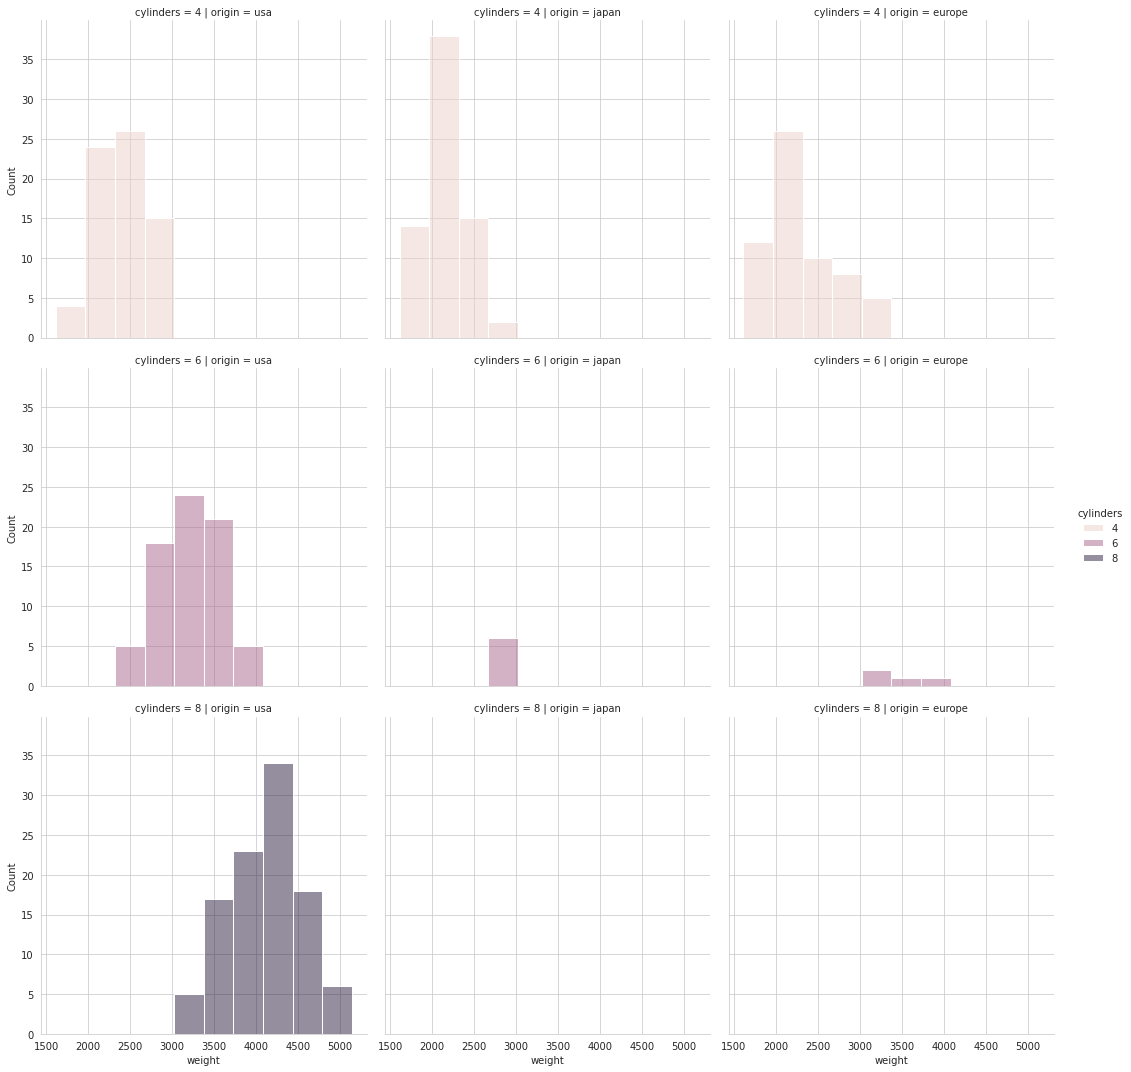

In [ ]:
car = sns.load_dataset('mpg').dropna()

sns.displot(x='weight', data=car[car.cylinders.isin([4,6,8])],
            hue='cylinders', col='origin', row='cylinders')

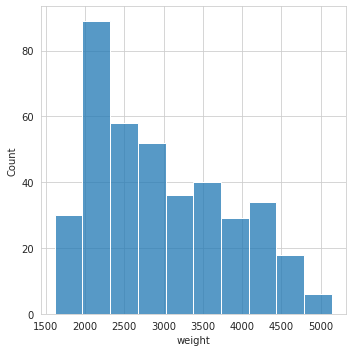

In [ ]:
g = sns.displot(x='weight', data=car, facet_kws={'despine':False})

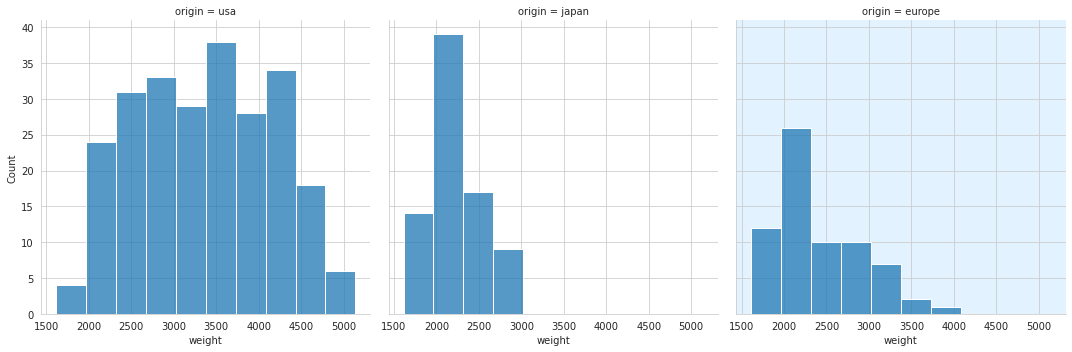

In [ ]:
g = sns.displot(x='weight', data=car, col='origin')

for col,ax in g.axes_dict.items():
  if col == 'europe':
    ax.set_facecolor('#E2F2FF')